In [505]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [506]:
from scipy.stats import spearmanr

In [507]:
df=pd.read_csv('./CarPrice.csv')

In [508]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [509]:
carcompany=[]
for i in df['CarName']:
    x=i.split(' ')
    carcompany.append(x[0])


In [510]:
ccompany = pd. Series(carcompany,name='carcompany')
ccompany

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: carcompany, Length: 205, dtype: object

In [511]:
df=pd.concat([df,ccompany],axis=1,names="carcompany")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [512]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'carcompany'],
      dtype='object')

In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [514]:
df.shape

(205, 27)

# EDA

In [515]:
#Check for null values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
carcompany          0
dtype: int64

In [516]:
df.drop('car_ID',axis=1,inplace=True)

In [517]:
df.drop('CarName',axis=1,inplace=True)

In [518]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [519]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

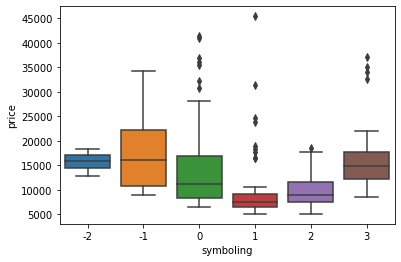

In [520]:
sns.boxplot(x='symboling',y='price',data=df)

In [521]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

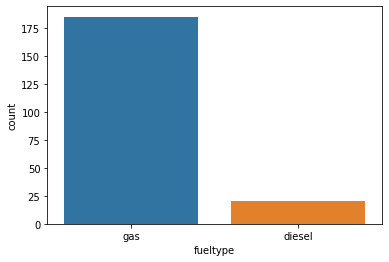

In [522]:
sns.countplot('fueltype',data=df)

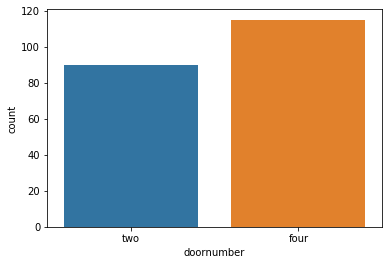

In [523]:
sns.countplot('doornumber',data=df)

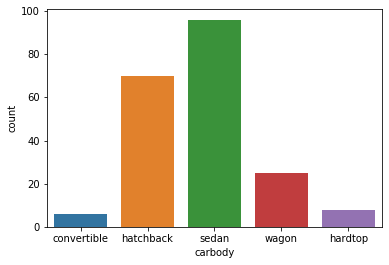

In [524]:
 sns.countplot('carbody',data=df)

In [525]:
df['carcompany'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
maxda           2
vw              2
porcshce        1
toyouta         1
mercury         1
Nissan          1
vokswagen       1
Name: carcompany, dtype: int64

# Feature Selection

### Correlation in numerical values

In [526]:
corr=df.corr()

In [527]:
print(corr['price'].sort_values(ascending=False))

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


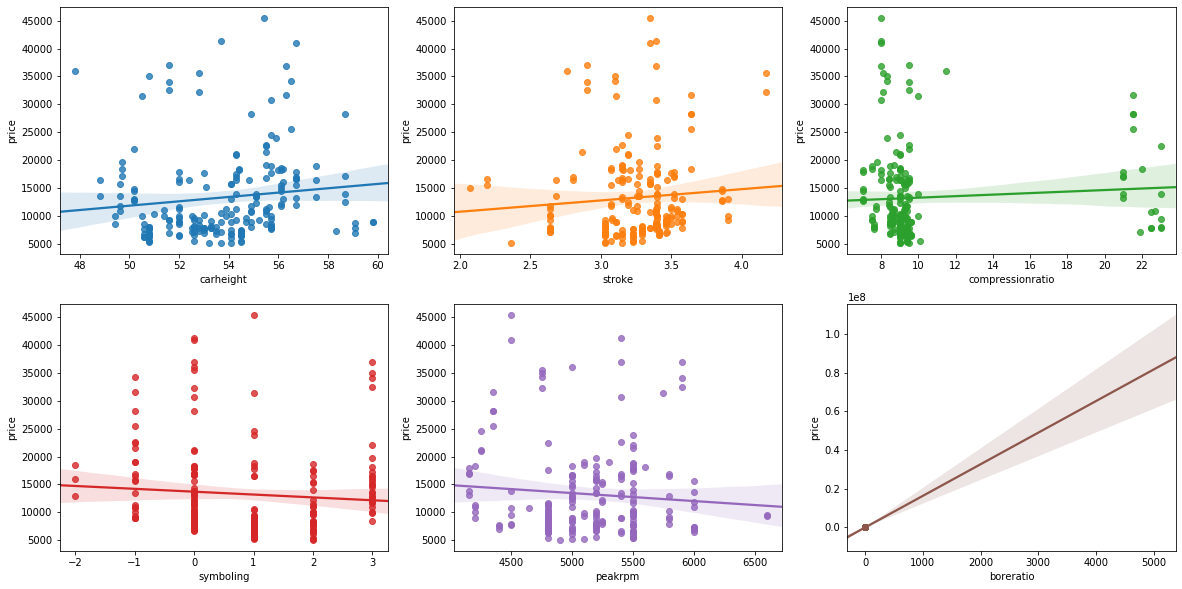

In [528]:
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
sns.regplot(x='carheight',y='price',data=df,ax=ax[0][0])
sns.regplot(x='stroke',y='price',data=df,ax=ax[0][1])
sns.regplot(x='compressionratio',y='price',data=df,ax=ax[0][2])
sns.regplot(x='symboling',y='price',data=df,ax=ax[1][0])
sns.regplot(x='peakrpm',y='price',data=df,ax=ax[1][1])
sns.regplot(x='boreratio',y='price',data=df,ax=ax[1][2])

In [529]:
#Droping the less correlated features
df.drop(['carheight','stroke','compressionratio','symboling','peakrpm'],axis=1,inplace=True)

In [530]:
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,carcompany
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0,alfa-romero
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0,alfa-romero
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0,alfa-romero
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0,audi
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0,audi


In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
fueltype          205 non-null object
aspiration        205 non-null object
doornumber        205 non-null object
carbody           205 non-null object
drivewheel        205 non-null object
enginelocation    205 non-null object
wheelbase         205 non-null float64
carlength         205 non-null float64
carwidth          205 non-null float64
curbweight        205 non-null int64
enginetype        205 non-null object
cylindernumber    205 non-null object
enginesize        205 non-null int64
fuelsystem        205 non-null object
boreratio         205 non-null float64
horsepower        205 non-null int64
citympg           205 non-null int64
highwaympg        205 non-null int64
price             205 non-null float64
carcompany        205 non-null object
dtypes: float64(5), int64(5), object(10)
memory usage: 32.2+ KB


### Correlation of categorical variables using frequency encoding

In [532]:
df1=df[['fueltype','aspiration','doornumber','carbody','enginelocation','drivewheel','enginetype','cylindernumber','fuelsystem','carcompany','price']]

In [533]:
df1.head()

,fueltype,aspiration,doornumber,carbody,enginelocation,drivewheel,enginetype,cylindernumber,fuelsystem,carcompany,price
0,gas,std,two,convertible,front,rwd,dohc,four,mpfi,alfa-romero,13495.0
1,gas,std,two,convertible,front,rwd,dohc,four,mpfi,alfa-romero,16500.0
2,gas,std,two,hatchback,front,rwd,ohcv,six,mpfi,alfa-romero,16500.0
3,gas,std,four,sedan,front,fwd,ohc,four,mpfi,audi,13950.0
4,gas,std,four,sedan,front,4wd,ohc,five,mpfi,audi,17450.0


In [534]:
cr=spearmanr(df['fueltype'],df['price'])
cr

SpearmanrResult(correlation=-0.1397370182567028, pvalue=0.04568297411674289)

In [535]:
cr=spearmanr(df['aspiration'],df['price'])
cr

SpearmanrResult(correlation=0.3089608795157809, pvalue=6.5637546727367955e-06)

In [536]:
cr=spearmanr(df['doornumber'],df['price'])
cr

SpearmanrResult(correlation=-0.11843053846139387, pvalue=0.09078794452672535)

In [537]:
cr=spearmanr(df['carbody'],df['price'])
cr

SpearmanrResult(correlation=0.09178485959664219, pvalue=0.19057227497525178)

In [538]:
cr=spearmanr(df['enginelocation'],df['price'])
cr

SpearmanrResult(correlation=0.19495140832725408, pvalue=0.005092262581381994)

In [539]:
cr=spearmanr(df['drivewheel'],df['price'])
cr

SpearmanrResult(correlation=0.6295655926534315, pvalue=4.9537966157749595e-24)

In [540]:
cr=spearmanr(df['enginetype'],df['price'])
cr

SpearmanrResult(correlation=-0.014279032322807406, pvalue=0.8389749107354644)

In [541]:
cr=spearmanr(df['cylindernumber'],df['price'])
cr

SpearmanrResult(correlation=0.10747578842121251, pvalue=0.12506511561176084)

In [542]:
cr=spearmanr(df['fuelsystem'],df['price'])
cr

SpearmanrResult(correlation=0.6821598241428165, pvalue=2.0468628898699014e-29)

In [543]:
cr=spearmanr(df['carcompany'],df['price'])
cr

SpearmanrResult(correlation=-0.06996569440946838, pvalue=0.31883586766915756)

In [544]:
#Droping the less correlated features
df.drop(['carcompany','enginetype','carbody','doornumber','cylindernumber'],axis=1,inplace=True)

In [545]:
df.head()

,fueltype,aspiration,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,gas,std,rwd,front,88.6,168.8,64.1,2548,130,mpfi,3.47,111,21,27,13495.0
1,gas,std,rwd,front,88.6,168.8,64.1,2548,130,mpfi,3.47,111,21,27,16500.0
2,gas,std,rwd,front,94.5,171.2,65.5,2823,152,mpfi,2.68,154,19,26,16500.0
3,gas,std,fwd,front,99.8,176.6,66.2,2337,109,mpfi,3.19,102,24,30,13950.0
4,gas,std,4wd,front,99.4,176.6,66.4,2824,136,mpfi,3.19,115,18,22,17450.0


# Feature Encoding

### Encoding all the categorical values 

In [546]:
fueltype=pd.get_dummies(df['fueltype'])
fueltype

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [547]:
aspiration=pd.get_dummies(df['aspiration'])
aspiration

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
200,1,0
201,0,1
202,1,0
203,0,1


In [548]:
drivewheel=pd.get_dummies(df['drivewheel'])
drivewheel

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0
...,...,...,...
200,0,0,1
201,0,0,1
202,0,0,1
203,0,0,1


In [549]:
enginelocation=pd.get_dummies(df['enginelocation'])
enginelocation

,front,rear
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
200,1,0
201,1,0
202,1,0
203,1,0


In [550]:
fuelsystem=pd.get_dummies(df['fuelsystem'])
fuelsystem

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,1,0,0
201,0,0,0,0,0,1,0,0
202,0,0,0,0,0,1,0,0
203,0,0,0,1,0,0,0,0


In [551]:
df2=df.drop(['fuelsystem','enginelocation','drivewheel','aspiration','fueltype'],axis=1)
df2.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0


In [552]:
app=[df2,fuelsystem,enginelocation,drivewheel,aspiration,fueltype]

In [553]:
df2=pd.concat(app,axis=1)

In [554]:
df2.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,spfi,front,rear,4wd,fwd,rwd,std,turbo,diesel,gas
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,...,0,1,0,0,0,1,1,0,0,1
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,...,0,1,0,0,0,1,1,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,...,0,1,0,0,0,1,1,0,0,1
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,0,1,0,0,1,0,1,0,0,1
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,...,0,1,0,1,0,0,1,0,0,1


In [555]:
x=df2.drop('price',axis=1)
x

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,1bbl,...,spfi,front,rear,4wd,fwd,rwd,std,turbo,diesel,gas
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,0,...,0,1,0,0,0,1,1,0,0,1
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,0,...,0,1,0,0,0,1,1,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,0,...,0,1,0,0,0,1,1,0,0,1
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,0,...,0,1,0,0,1,0,1,0,0,1
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,0,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,23,28,0,...,0,1,0,0,0,1,1,0,0,1
201,109.1,188.8,68.8,3049,141,3.78,160,19,25,0,...,0,1,0,0,0,1,0,1,0,1
202,109.1,188.8,68.9,3012,173,3.58,134,18,23,0,...,0,1,0,0,0,1,1,0,0,1
203,109.1,188.8,68.9,3217,145,3.01,106,26,27,0,...,0,1,0,0,0,1,0,1,1,0


In [556]:
y=df2['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [557]:
from sklearn.linear_model import LinearRegression

In [558]:
from sklearn.svm import SVR

In [559]:
from sklearn.tree import DecisionTreeRegressor

In [560]:
from sklearn.ensemble import RandomForestRegressor

In [561]:
from sklearn.model_selection import cross_val_score

In [562]:
from sklearn.model_selection import ShuffleSplit

In [563]:
cv=ShuffleSplit(n_splits=10,test_size=0.3,random_state=42)

In [564]:
print(cross_val_score(LinearRegression(),x,y,cv=cv,))

[0.82839115 0.89141601 0.69115195 0.86964112 0.88871434 0.76205501
 0.89269035 0.76054183 0.84472243 0.84644502]


In [565]:
print(cross_val_score(LinearRegression(),x,y,cv=cv).mean())

0.8275769220485973


In [566]:
print(cross_val_score(SVR(kernel='linear',degree=3),x,y,cv=cv).mean())

0.7502821227200994


In [567]:
print(cross_val_score(DecisionTreeRegressor(),x,y,cv=cv).mean())

0.8815929403189093


In [568]:
print(cross_val_score(RandomForestRegressor(),x,y,cv=cv))

[0.94078616 0.92352301 0.87854914 0.91505717 0.92663632 0.90576053
 0.92074353 0.91424797 0.92165981 0.92255808]


In [569]:
print(cross_val_score(RandomForestRegressor(),x,y,cv=cv).mean())

0.9176348582240952
